In [2]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
import pandas as pd
import math
from sklearn.feature_selection import RFE
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
def load_dataset(dataset_name, mix=True):
    dataset = np.load(dataset_name, allow_pickle=True)
    X = dataset[()]['x']
    Y = dataset[()]['y']
    if mix:
        x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.1, random_state=9)
        return x_train, x_test, y_train, y_test
    else:
        return X, Y

In [4]:
enterface_x, enterface_y = load_dataset('datasets/enterface_balanceado.npy', mix=False)
meld_x, meld_y = load_dataset('datasets/meld_balanceado.npy', mix=False)
full_x = np.concatenate((meld_x, enterface_x), axis=0)
full_y = np.concatenate((meld_y, enterface_y), axis=0)
x_train, x_test, y_train, y_test = train_test_split(np.array(full_x), np.array(full_y), test_size=0.1, random_state=9)

In [5]:
model = ExtraTreesClassifier(n_estimators=500)
model.fit(x_train, y_train)


ExtraTreesClassifier(n_estimators=500)

In [6]:
feature_importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = ['mfcc'] * 16 + ['mfcc_delta1'] * 16 + ['mfcc_delta2'] * 16 +[
    "meanF0",
    "stdevF0",
    "meanF0delta",
    "hnr",
    "crest_factor",
    "rms",
    # "f_means",
    # "f_medians",
    "spectral_centroid",
    "spectral_rollof",
    "zero_crossing_rate",
]

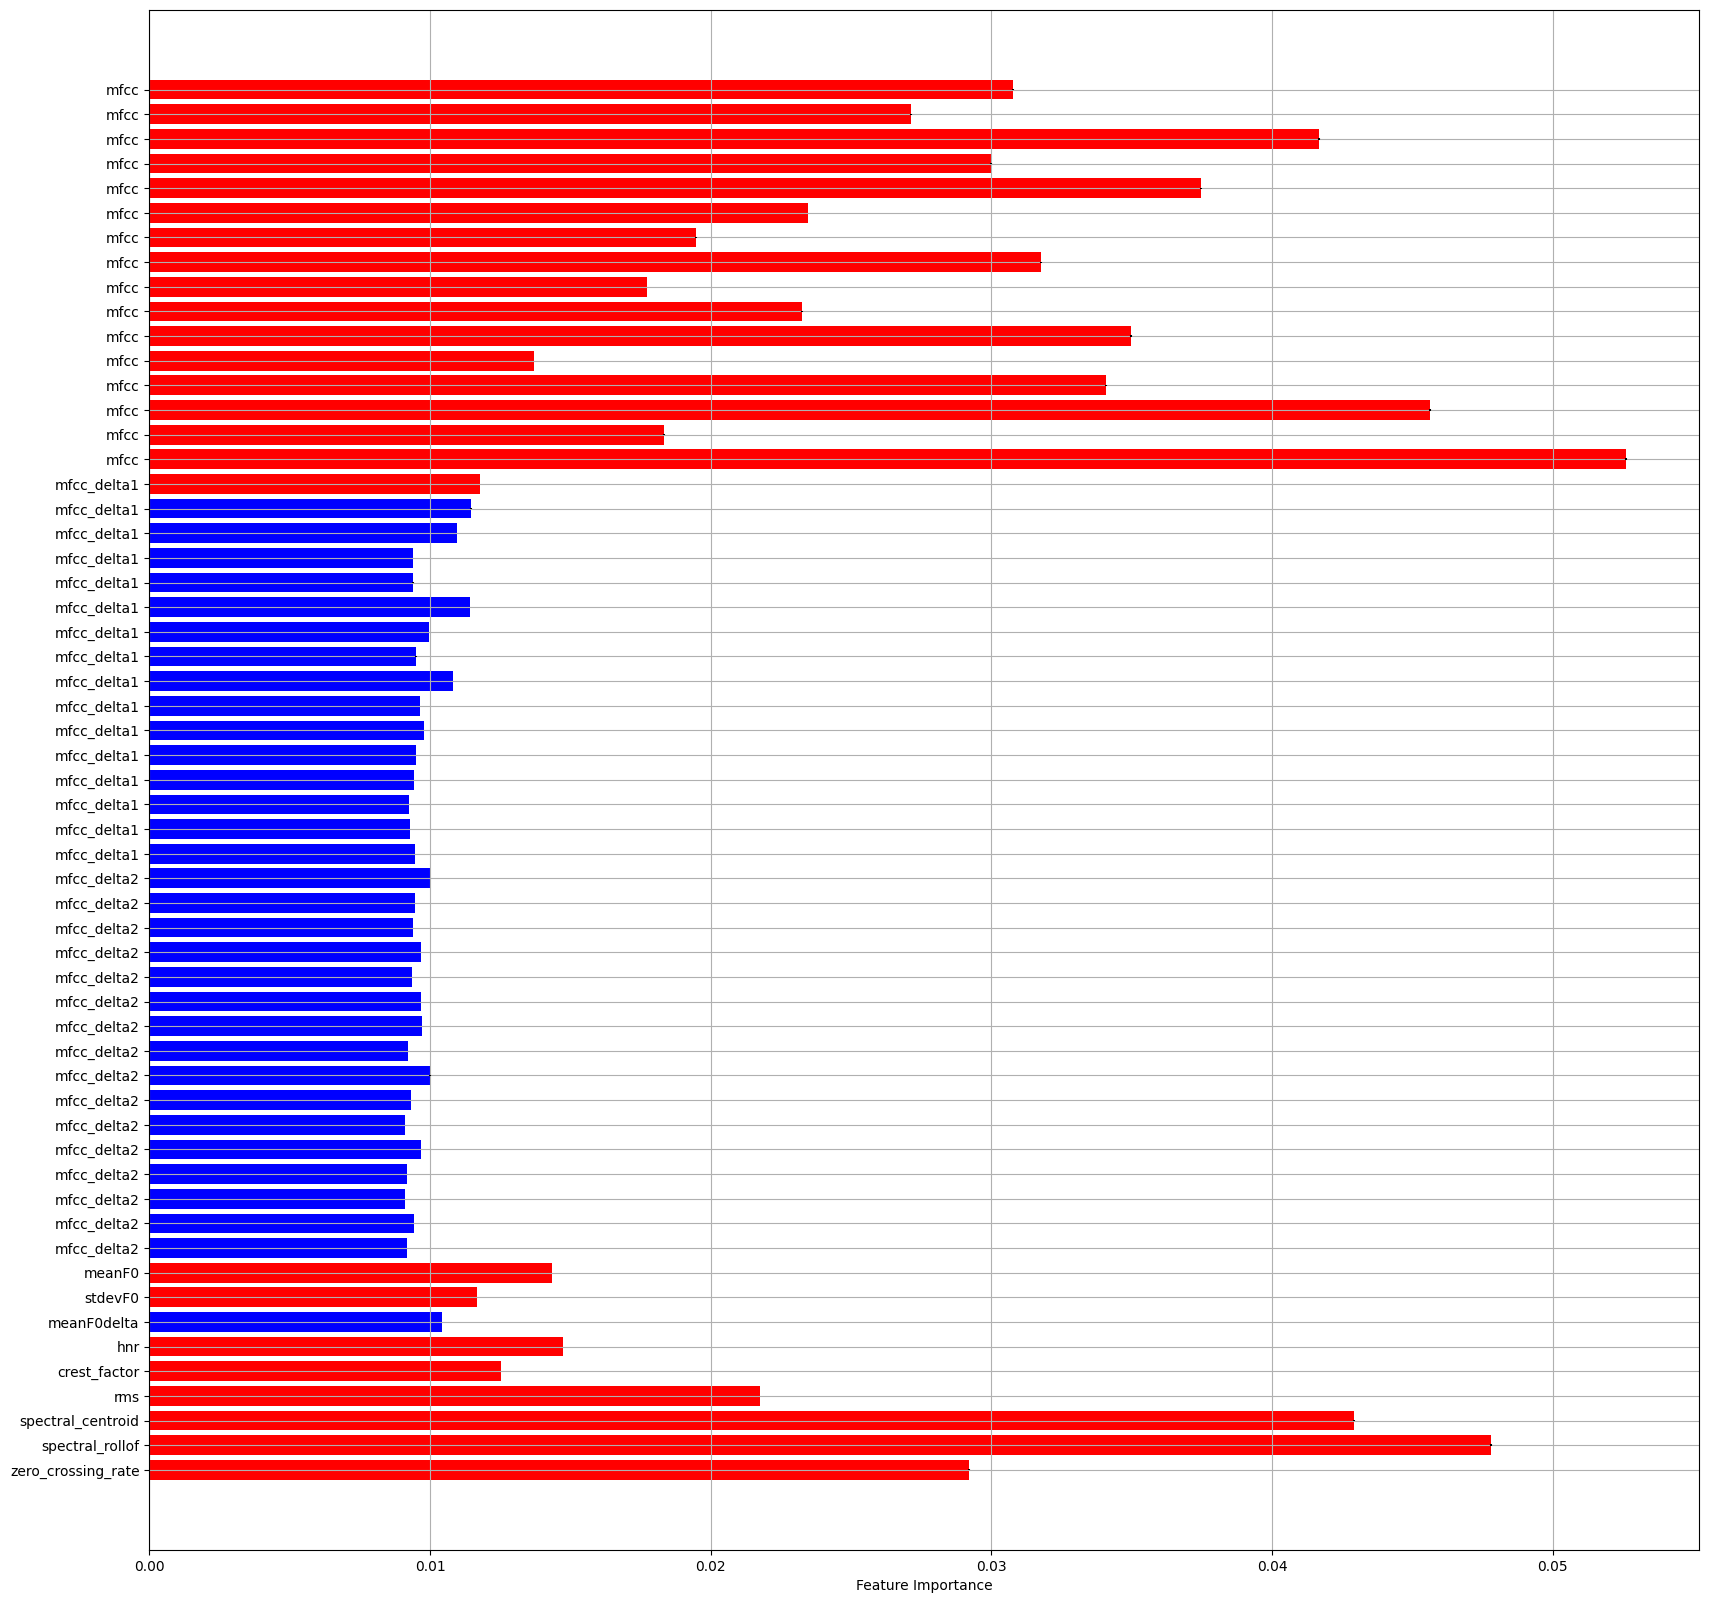

In [7]:
n_top = 25
plt.rcdefaults()

fig, ax = plt.subplots(figsize=(20,20))
top = np.argpartition(feature_importance, -n_top)[-n_top:]

colors = np.array(['blue'] * len(feature_importance))
colors[top] = 'red'

y_pos = np.arange(len(feature_names))
ax.barh(y_pos, feature_importance, yerr=std, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.grid()
plt.show()

In [8]:
median_importance = np.median(feature_importance)
std_importance = np.std(feature_importance)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
# print(std_importance)
# print(median_importance + (2*std_importance))

0.9996737712048717
0.8620352250489237


In [9]:
def metrics(x_test, y_test, x_train, y_train, model)
    y_pred = model.predict(x_test)
    threshold = 0.5
    y_pred_binary = []
    for pred in y_pred:
        if pred > threshold:
            y_pred_binary.append(1)
        else:
            y_pred_binary.append(0)

    conf = confusion_matrix(y_test, y_pred_binary)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    accuracy_train = (tp + tn) / (fn + fp + tp + tn) #Exactitud, porcentaje de predicciones correctas
    precision_train = tp / (fp + tp) #Precisión, porcentaje de predicciones positivas correctas
    specifity_train = tn / (tn + fn) #Especificidad, porcentaje de casos negativos detectados correctamente
    recall_train = tp / (tp + fn) # sensibilidad, porcentaje de casos positivos detectados
    true_negative_rate_train = tn / (tn + fp)
    F1_score_train = precision_train * 2 * recall_train / (precision_train + recall_train)

    y_pred = model.predict(x_train)
    threshold = 0.5
    y_pred_binary = []
    for pred in y_pred:
        if pred > threshold:
            y_pred_binary.append(1)
        else:
            y_pred_binary.append(0)

    conf = confusion_matrix(y_train, y_pred_binary)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_binary).ravel()
    accuracy_train = (tp + tn) / (fn + fp + tp + tn) #Exactitud, porcentaje de predicciones correctas
    precision_train = tp / (fp + tp) #Precisión, porcentaje de predicciones positivas correctas
    specifity_train = tn / (tn + fn) #Especificidad, porcentaje de casos negativos detectados correctamente
    recall_train = tp / (tp + fn) # sensibilidad, porcentaje de casos positivos detectados
    true_negative_rate_train = tn / (tn + fp)
    F1_score_train = precision_train * 2 * recall_train / (precision_train + recall_train)
    print('Exactitud: ', accuracy, '/ ', accuracy_train)
    print('Precisión: ', precision, '/ ', precision_train)
    print('Especificidad: ', specifity, '/ ', specifity_train)
    print('Sensibilidad: ', recall, '/ ', recall_train)
    print(' true_negative_rate: ', true_negative_rate, '/ ', true_negative_rate_train)
    print('F1 - Score: ', F1_score, '/ ', F1_score_train)

Exactitud:  0.8620352250489237
Precisión:  0.9296187683284457
Especificidad:  0.8281938325991189
Sensibilidad:  0.7304147465437788
 true_negative_rate:  0.9591836734693877
F1 - Score:  0.8180645161290323


In [ ]:
metrics(x_test, y_test, x_train, y_train, model)

In [10]:
result = permutation_importance(
    model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2, scoring='recall'
)


[]

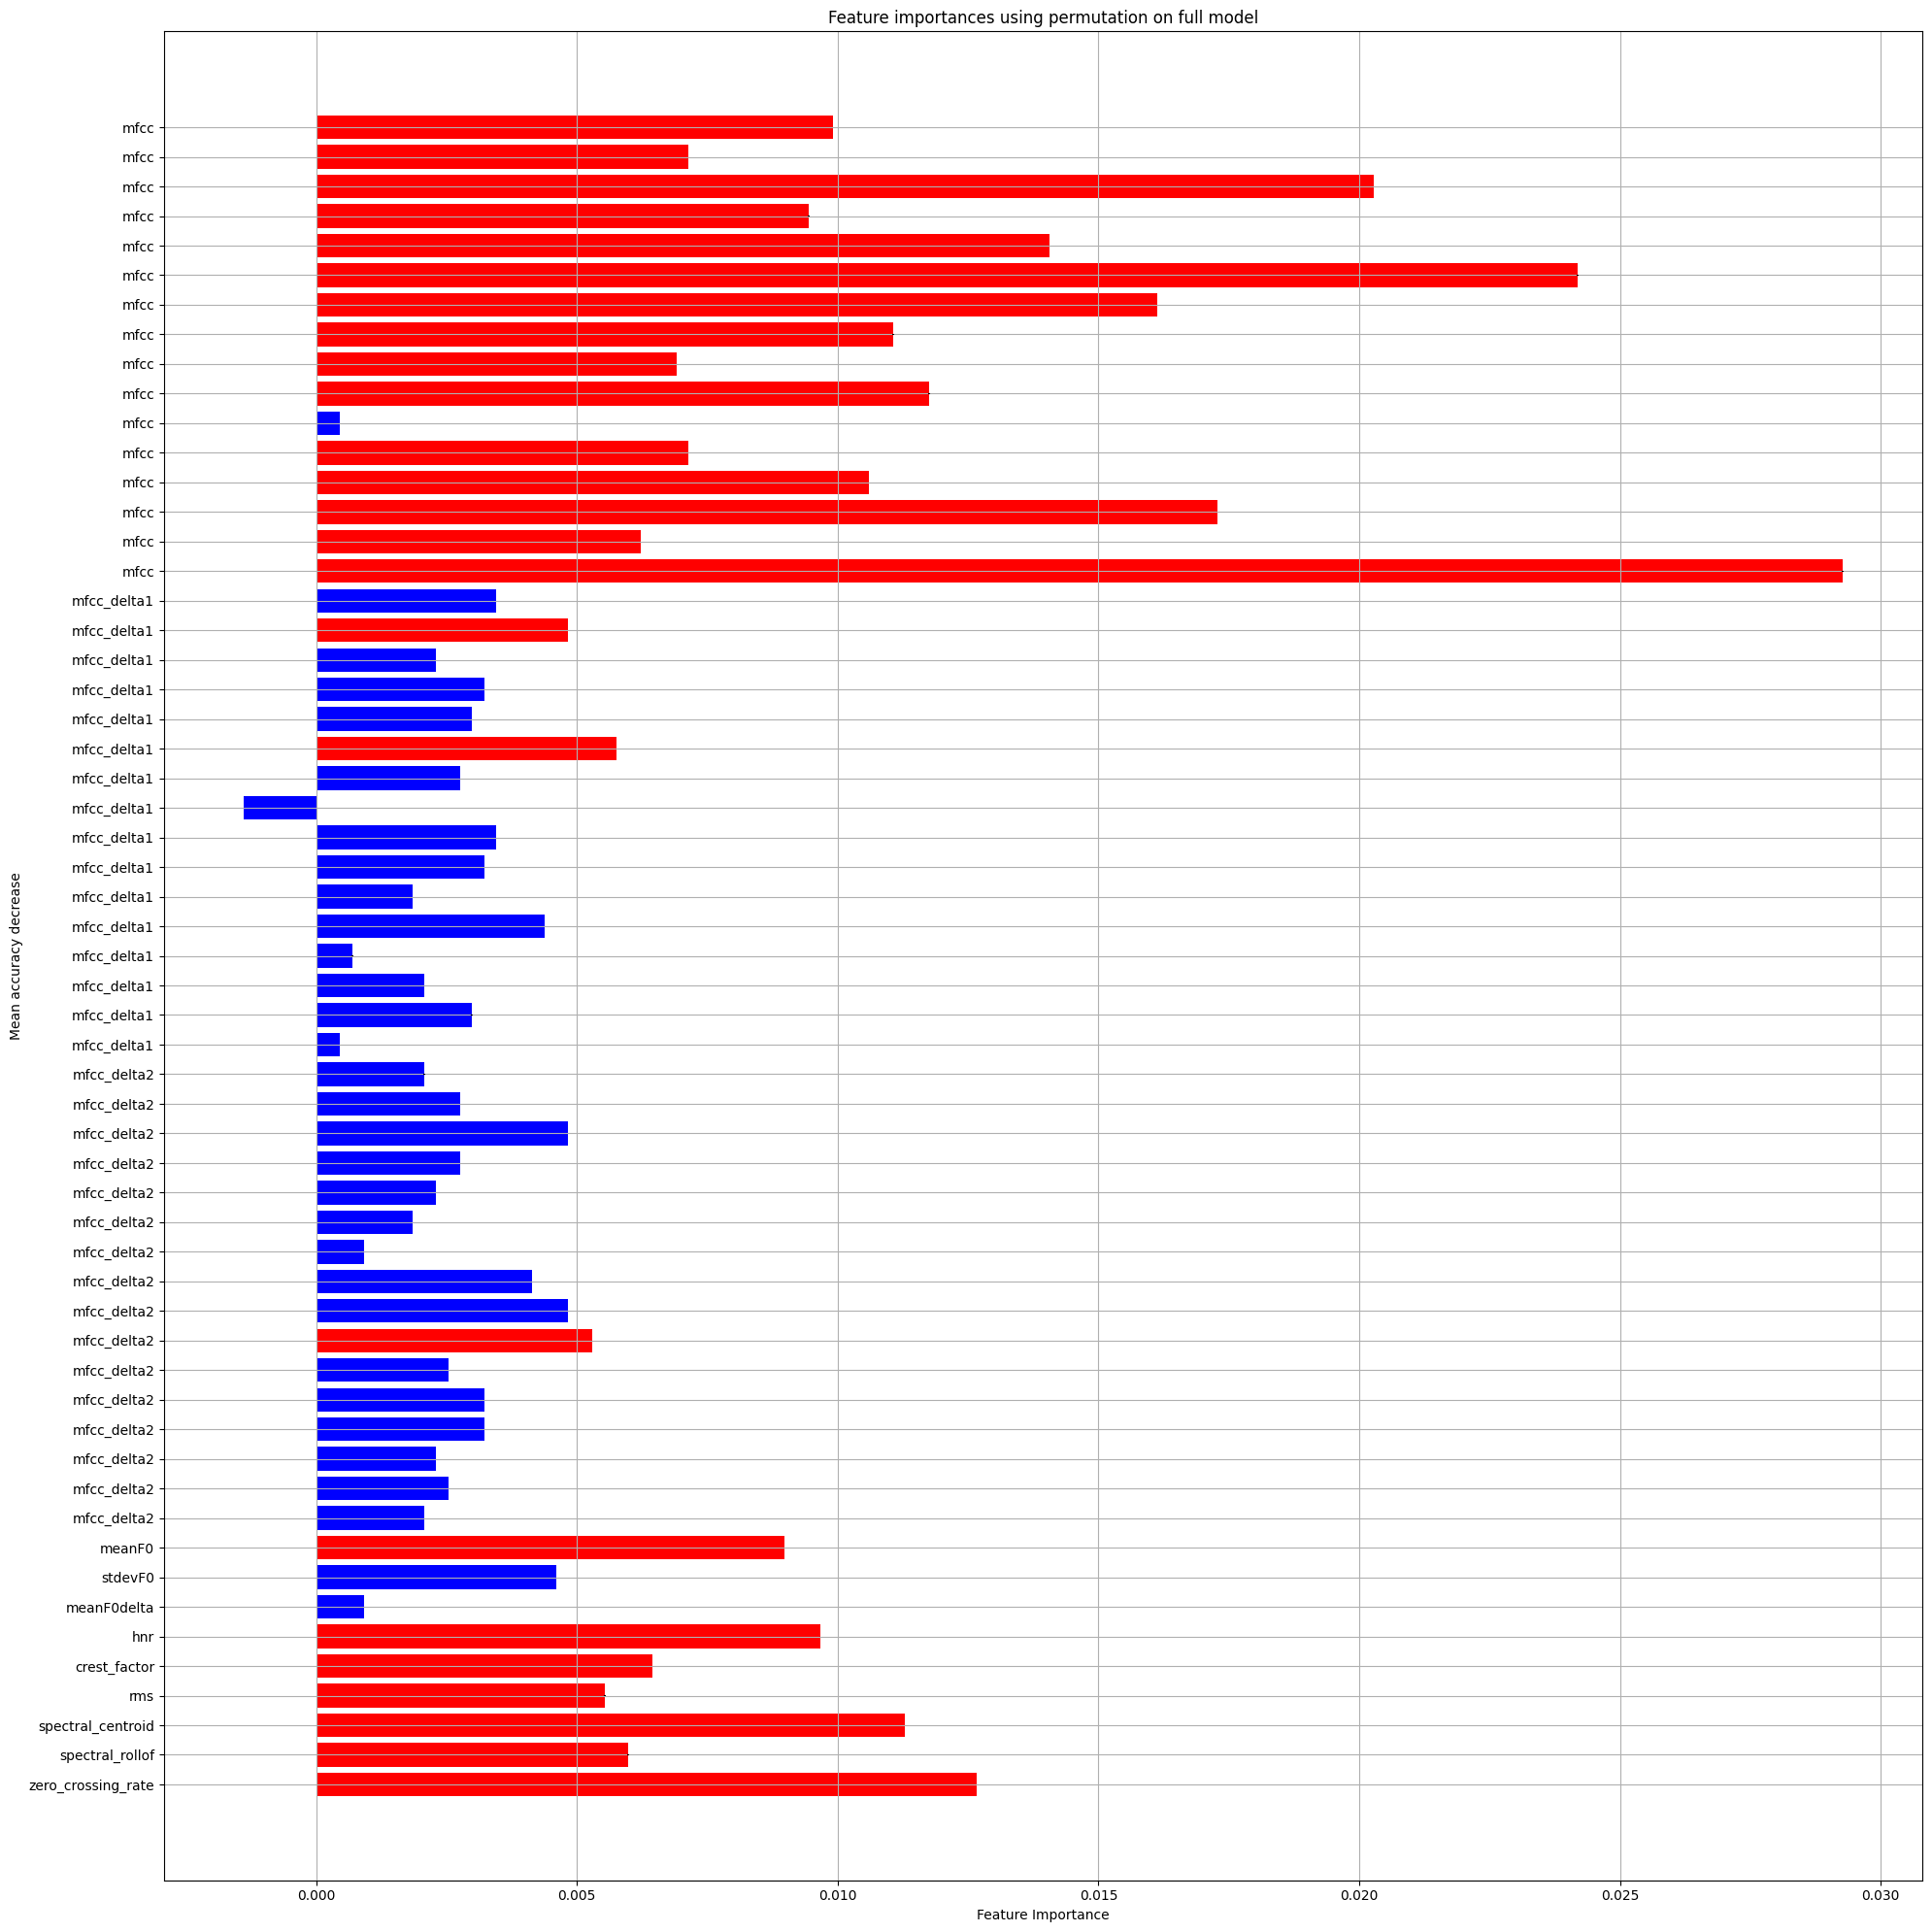

In [11]:

fig, ax = plt.subplots(figsize=(20,20))
top = np.argpartition(result.importances_mean, -n_top)[-n_top:]

colors = np.array(['blue'] * len(feature_importance))
colors[top] = 'red'

y_pos = np.arange(len(feature_names))
ax.barh(y_pos, result.importances_mean, yerr=result.importances_std, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')

ax.grid()
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
ax.plot()

In [12]:
random = np.random.rand(full_x.shape[0])
full_x_rand = np.c_[full_x,random]

x_train_rand, x_test_rand, y_train_rand, y_test_rand= train_test_split(np.array(full_x_rand), np.array(full_y), test_size=0.1, random_state=9)

In [13]:
model_random = ExtraTreesClassifier(n_estimators=500)
model_random.fit(x_train_rand, y_train_rand)

ExtraTreesClassifier(n_estimators=500)

In [14]:
median_importance = np.median(feature_importance)
std_importance = np.std(feature_importance)

print(model_random.score(x_train_rand,y_train_rand))
print(model_random.score(x_test_rand,y_test_rand))

1.0
0.8590998043052838


In [15]:
feature_importance = model_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_random.estimators_], axis=0)
feature_names = ['mfcc'] * 16 + ['mfcc_delta1'] * 16 + ['mfcc_delta2'] * 16 +[
    "meanF0",
    "stdevF0",
    "meanF0delta",
    "hnr",
    "crest_factor",
    "rms",
    # "f_means",
    # "f_medians",
    "spectral_centroid",
    "spectral_rollof",
    "zero_crossing_rate",
    "random"
]

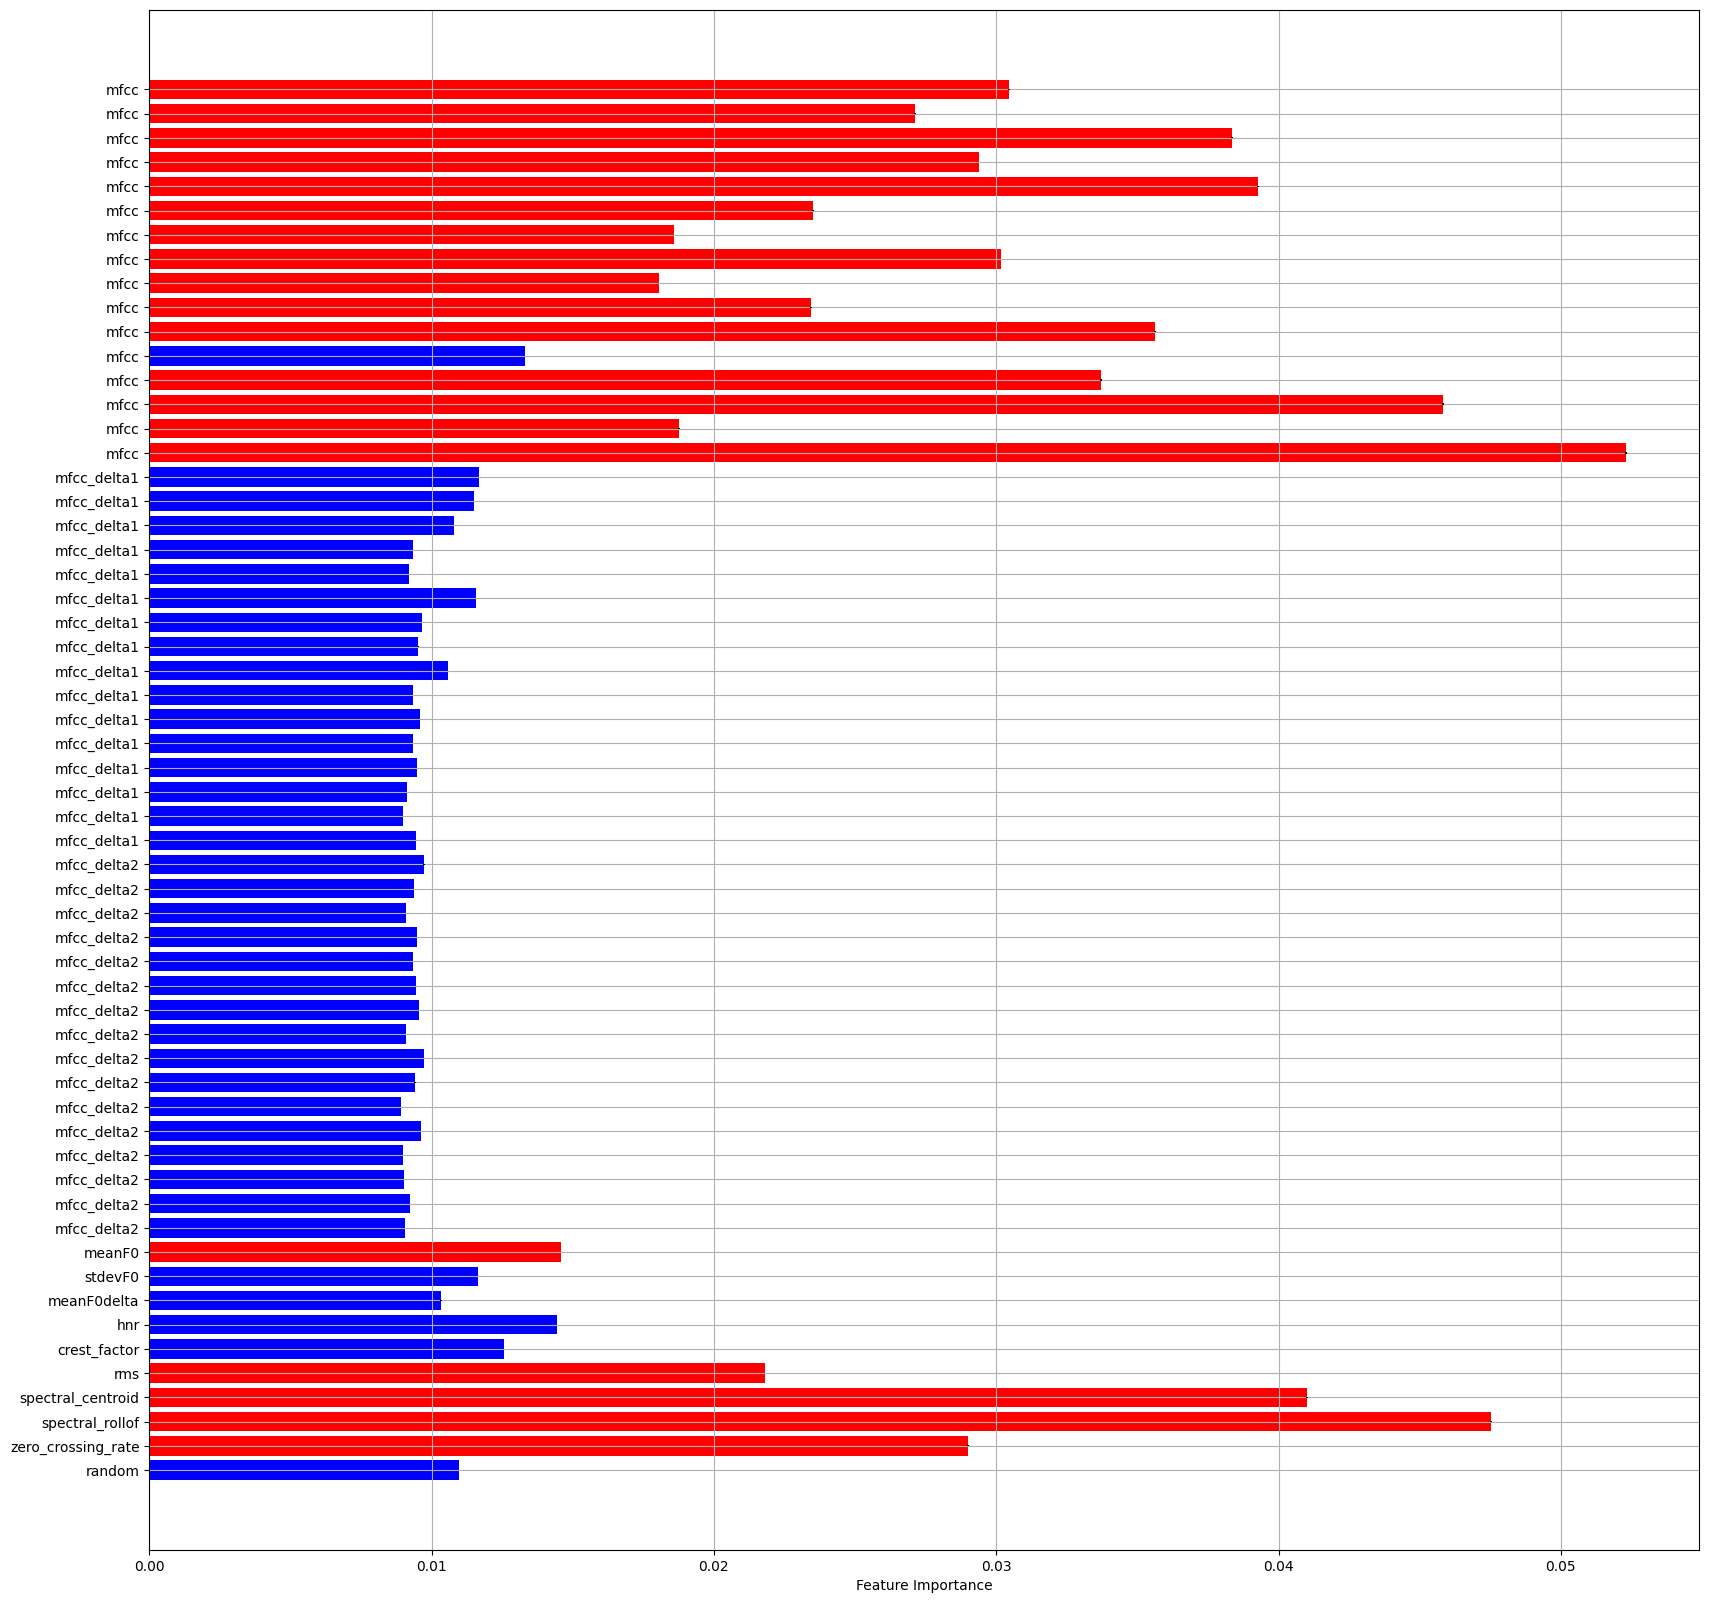

In [16]:
n_top = 20

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(20,20))
top = np.argpartition(feature_importance, -n_top)[-n_top:]

colors = np.array(['blue'] * len(feature_importance))
colors[top] = 'red'

y_pos = np.arange(len(feature_names))
ax.barh(y_pos, feature_importance, yerr=std, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.grid()
plt.show()

In [17]:
result = permutation_importance(
    model_random, x_test_rand, y_test_rand, n_repeats=10, random_state=42, n_jobs=2, scoring='recall'
)

[]

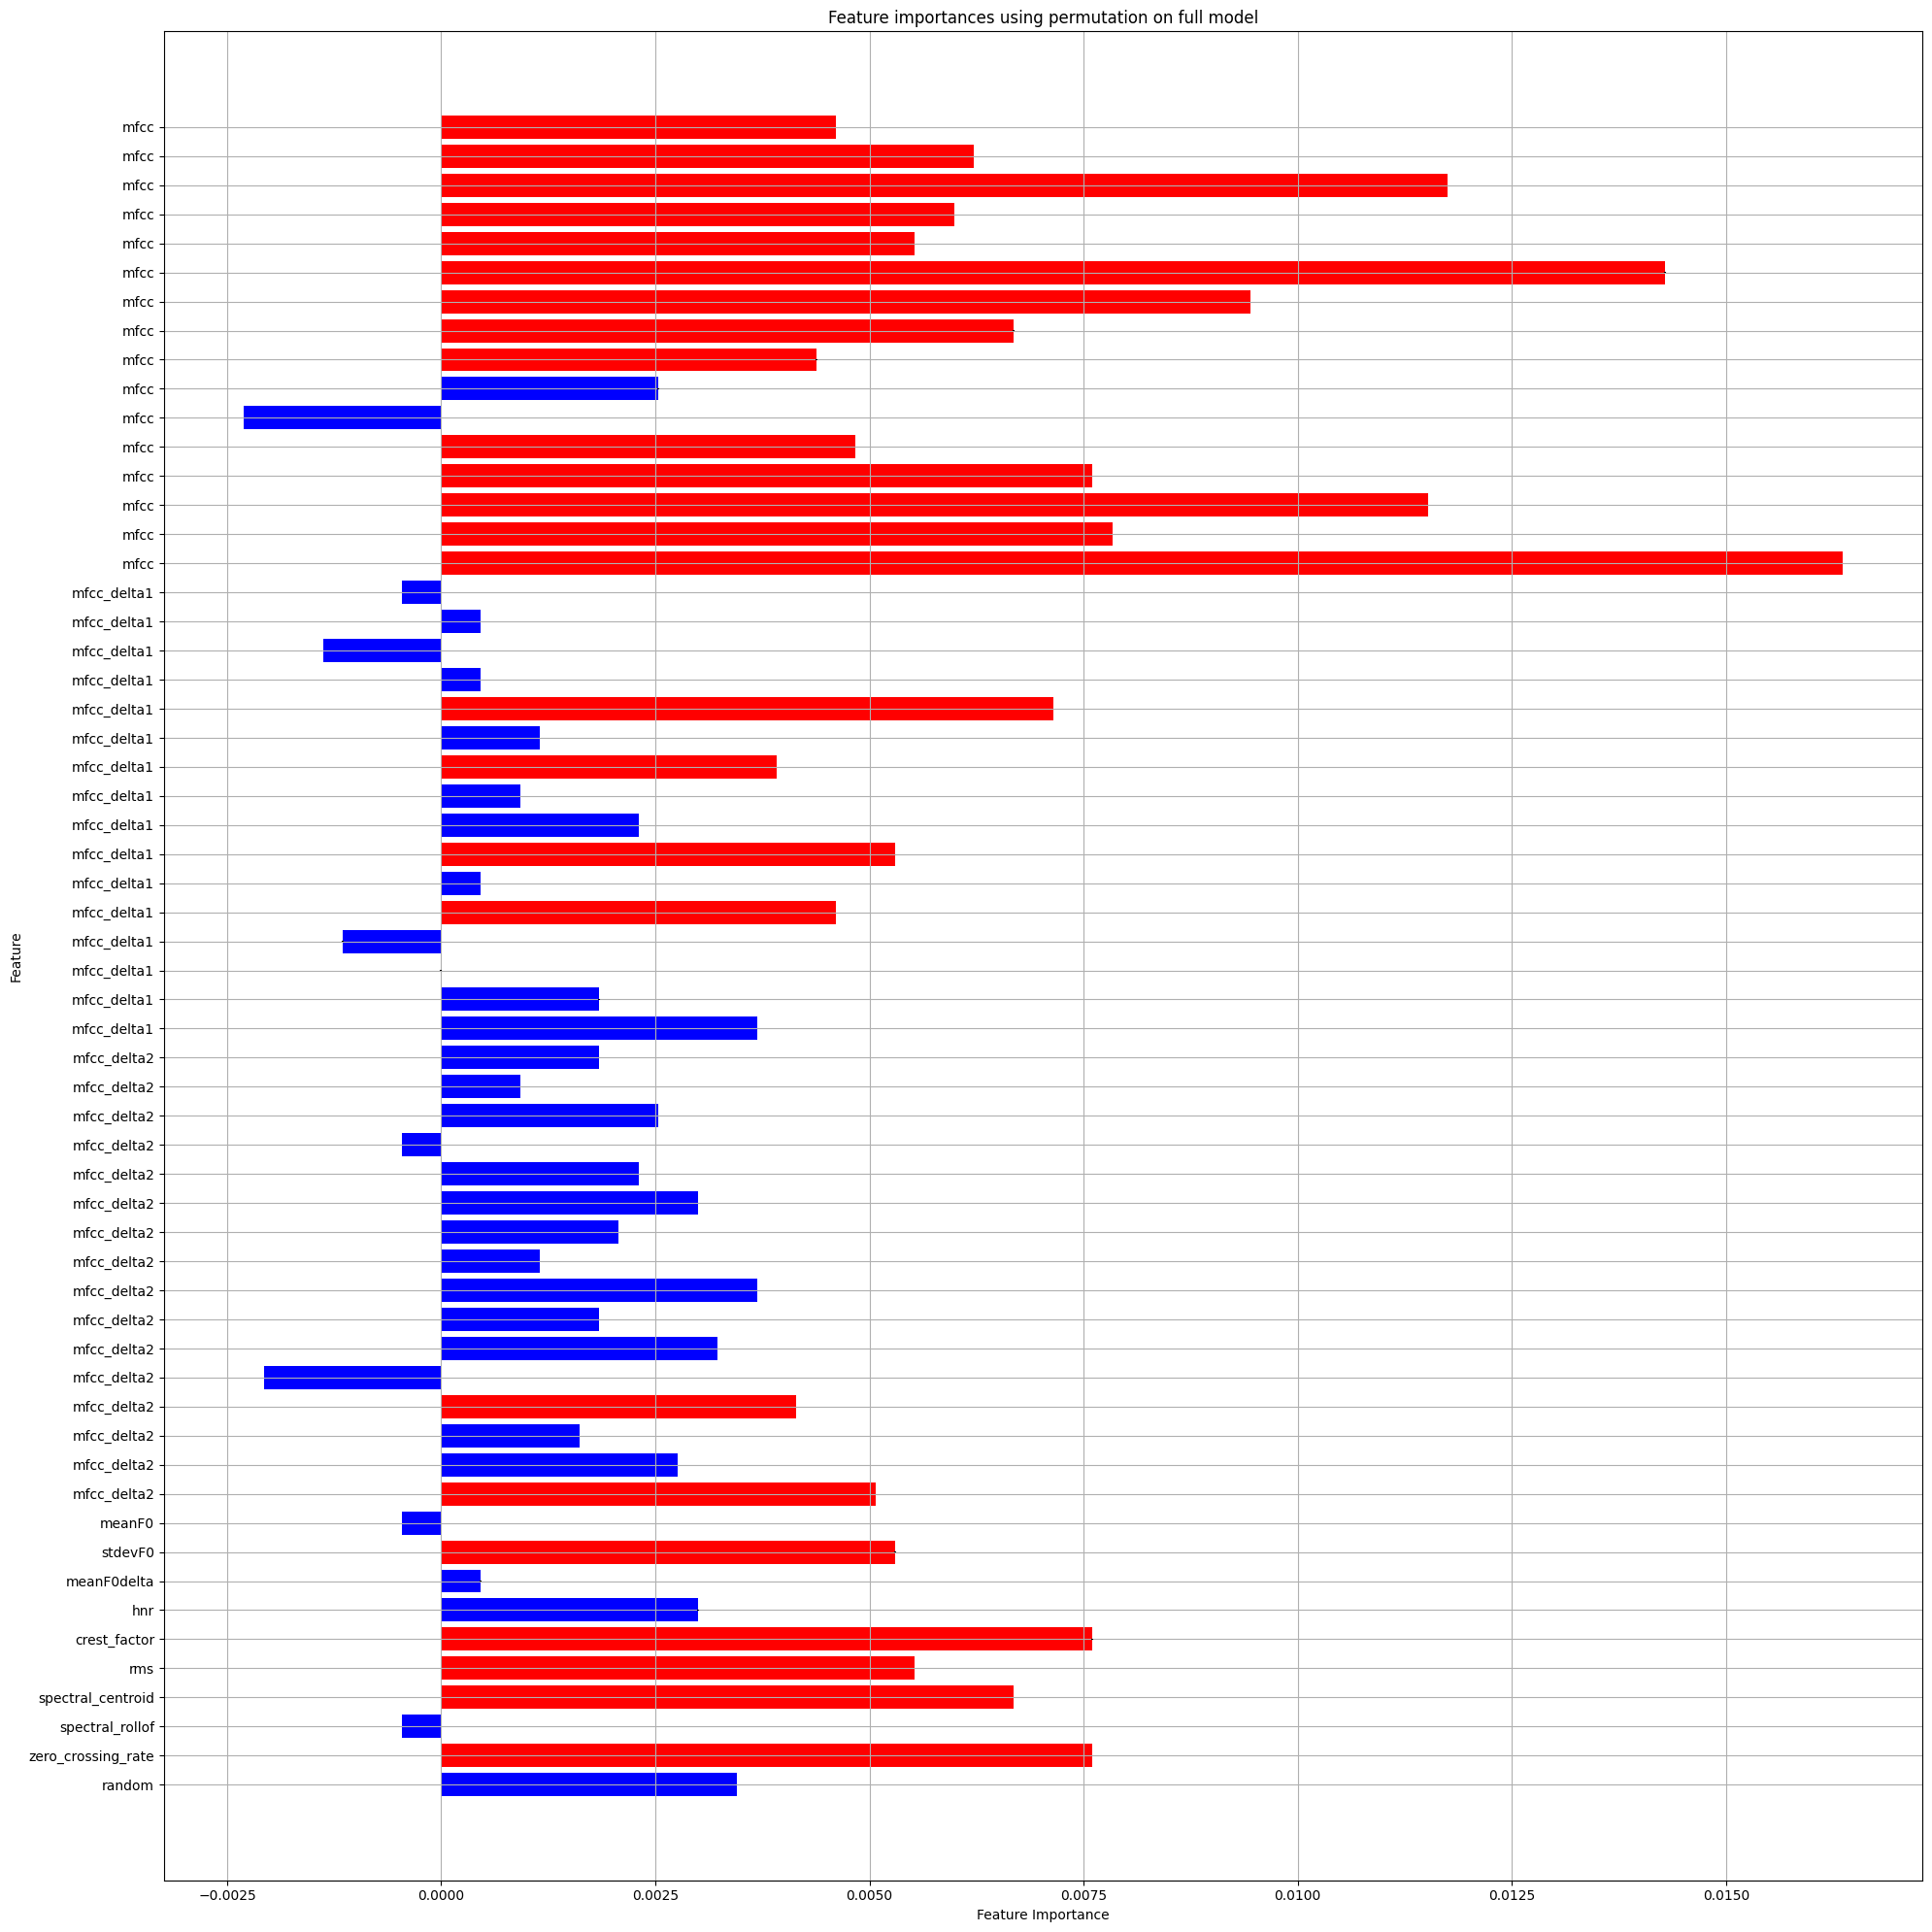

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
top = np.argpartition(result.importances_mean, -25)[-25:]

colors = np.array(['blue'] * len(feature_importance))
colors[top] = 'red'

y_pos = np.arange(len(feature_names))
ax.barh(y_pos, result.importances_mean, yerr=result.importances_std, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')

ax.grid()
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Feature")
fig.tight_layout()
ax.plot()

In [19]:
rho, pval = stats.spearmanr(full_x)

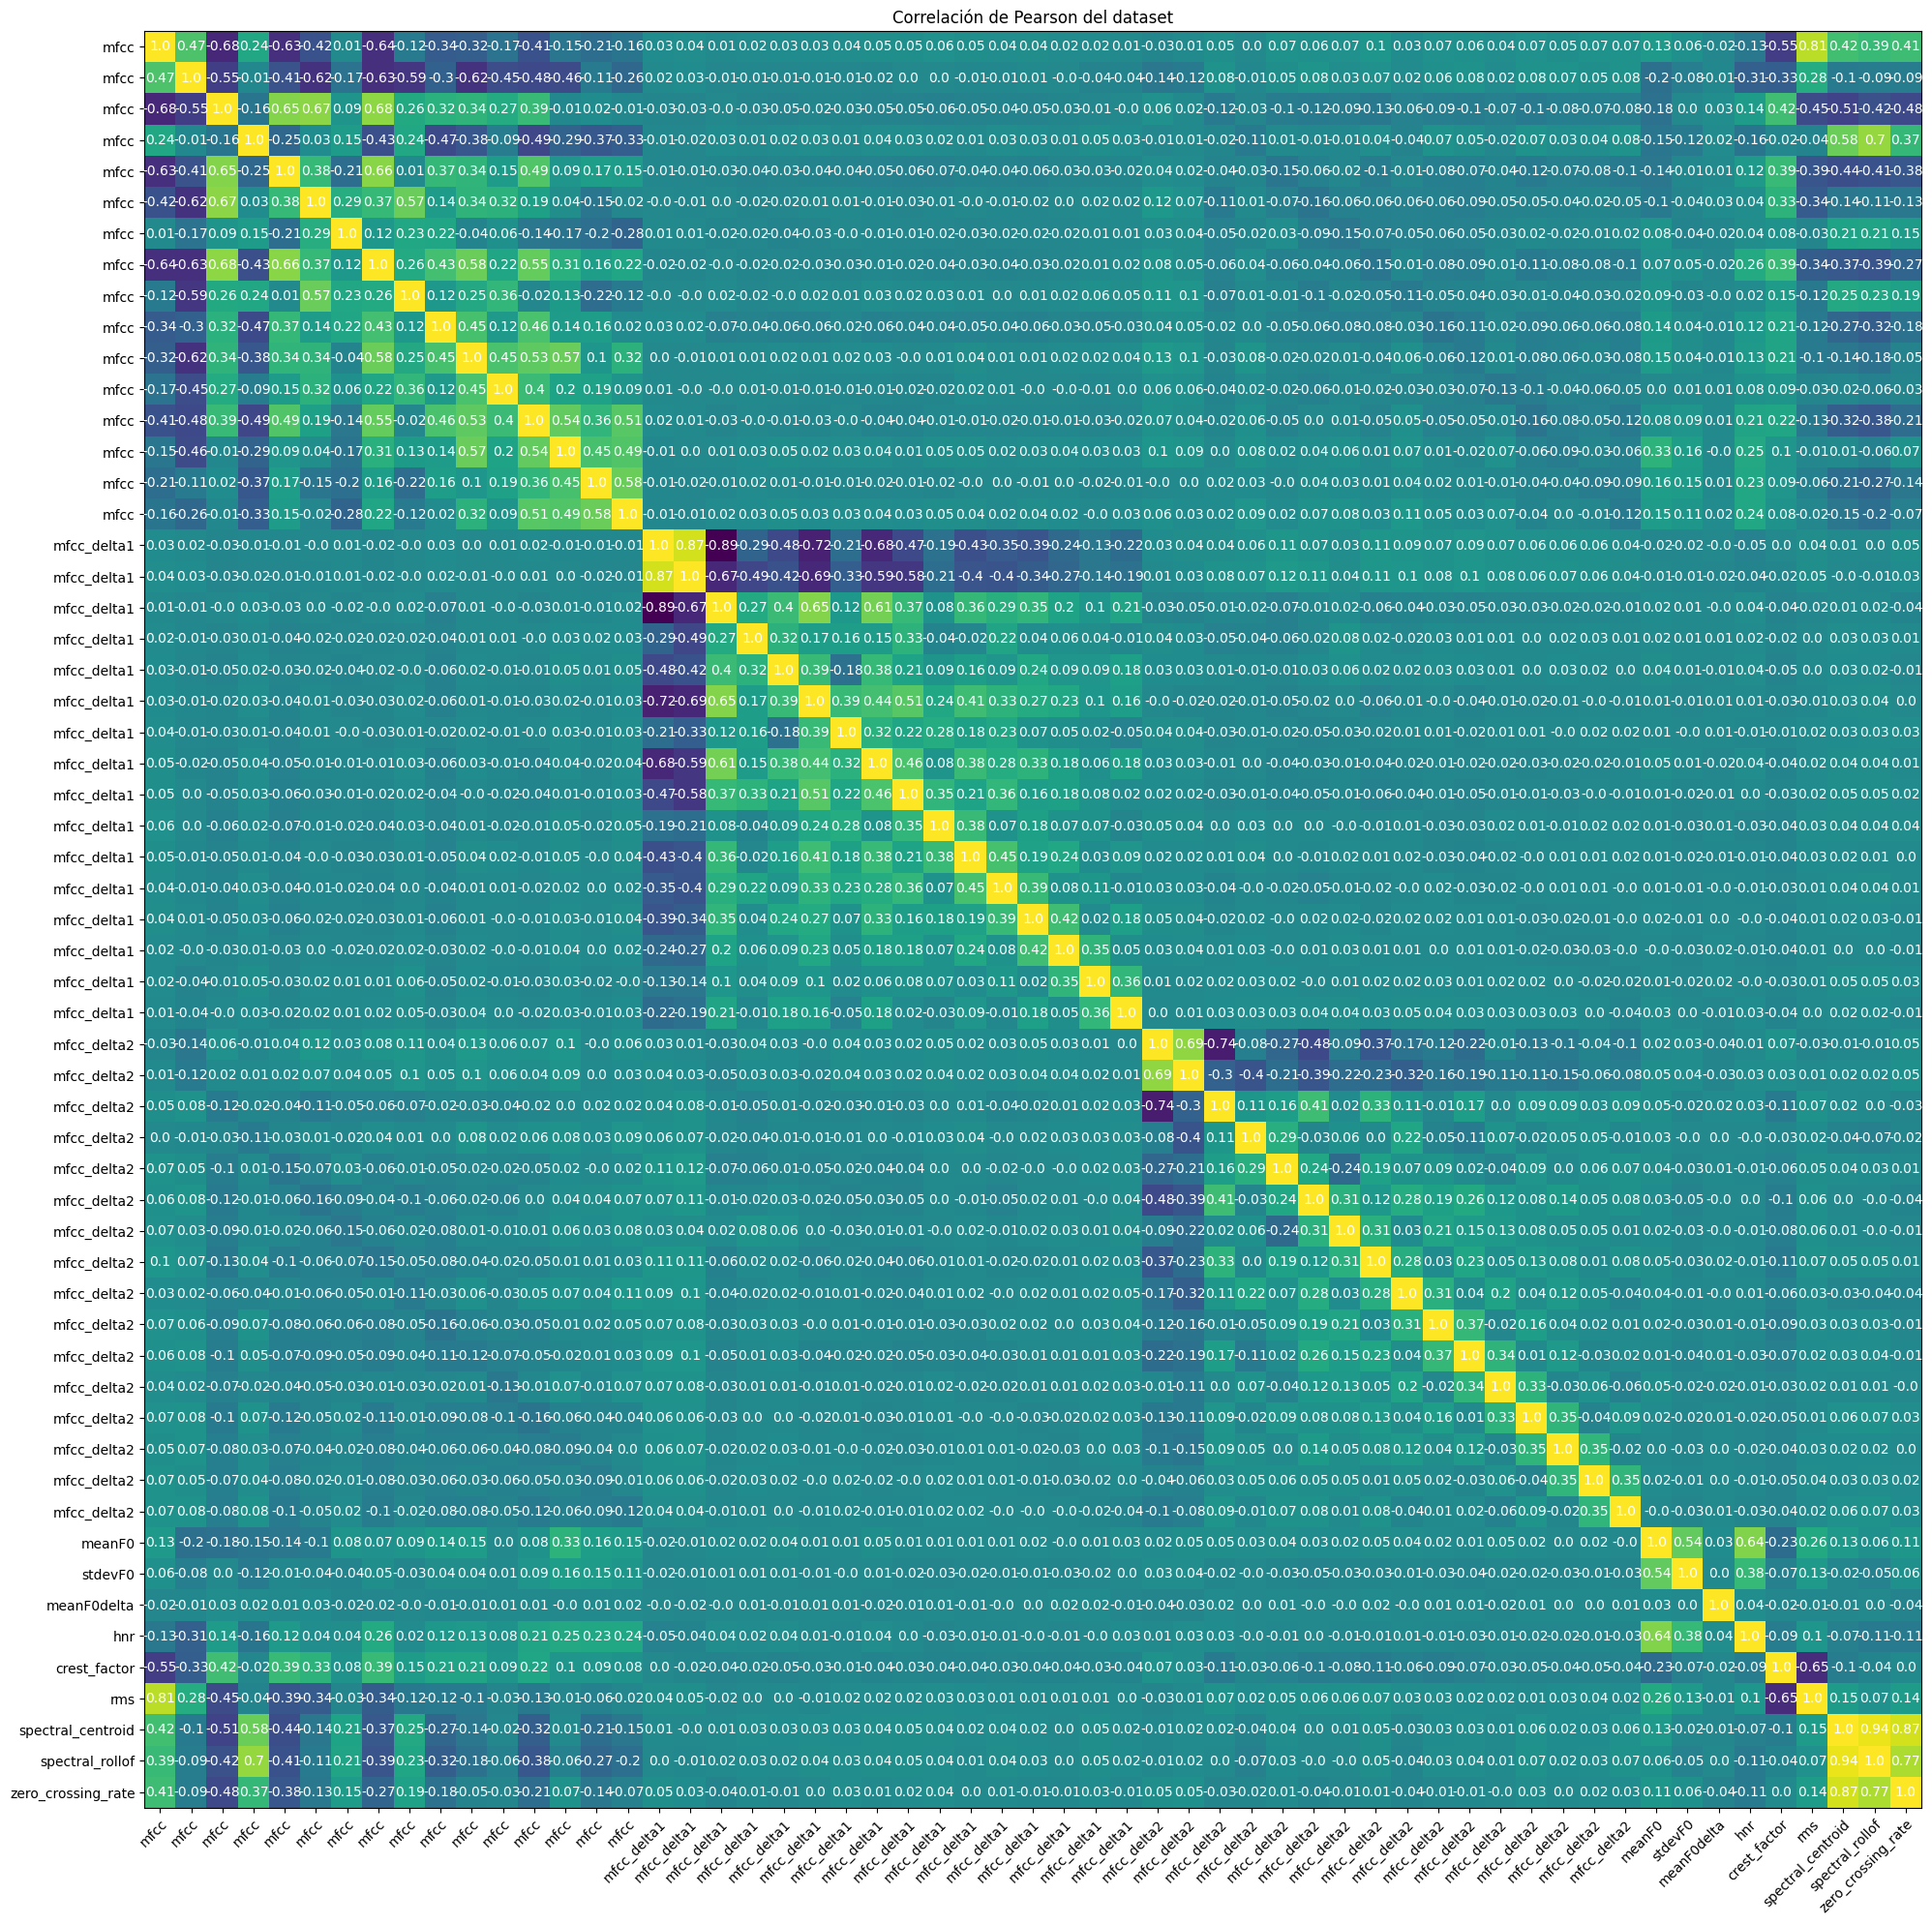

In [20]:

feature_names = ['mfcc'] * 16 + ['mfcc_delta1'] * 16 + ['mfcc_delta2'] * 16 +[
    "meanF0",
    "stdevF0",
    "meanF0delta",
    "hnr",
    "crest_factor",
    "rms",
    # "f_means",
    # "f_medians",
    "spectral_centroid",
    "spectral_rollof",
    "zero_crossing_rate",
]

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(rho)

# We want to show all ticks...
ax.set_xticks(np.arange(len(feature_names)))
ax.set_yticks(np.arange(len(feature_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(feature_names)
ax.set_yticklabels(feature_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax.text(j, i, round(rho[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_title("Correlación de Pearson del dataset")
fig.tight_layout()
plt.show()

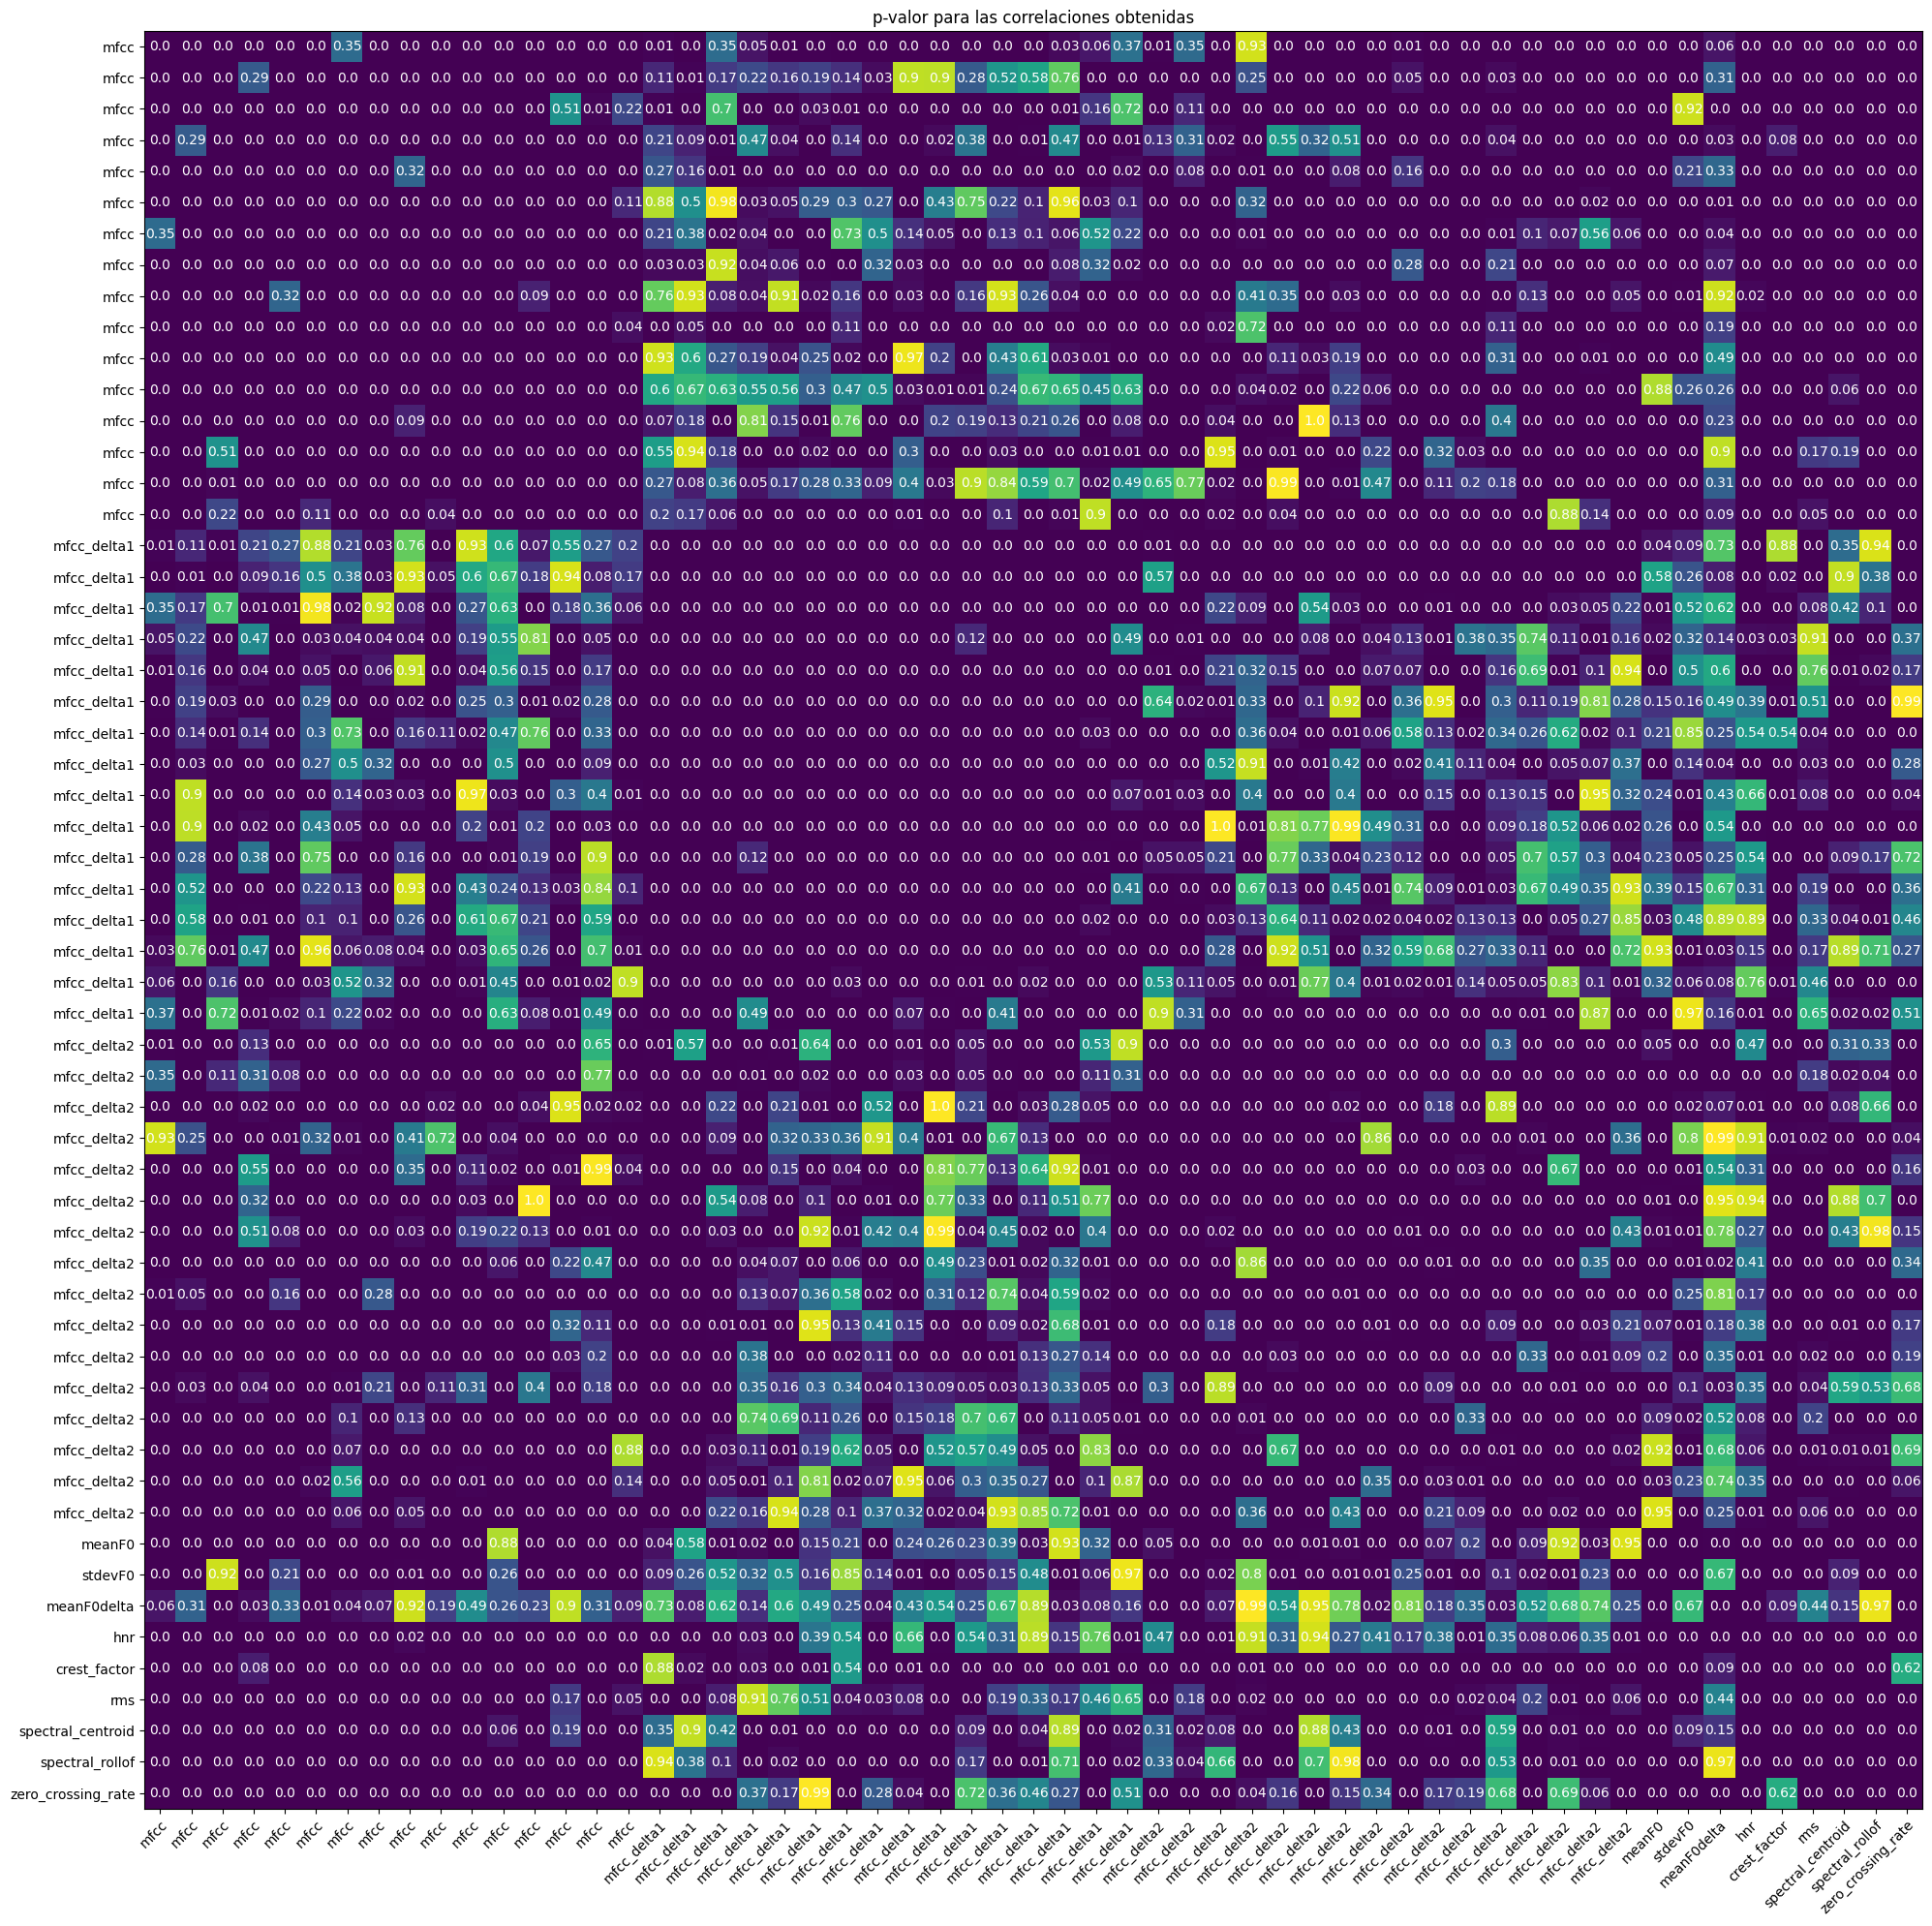

In [21]:
feature_names = ['mfcc'] * 16 + ['mfcc_delta1'] * 16 + ['mfcc_delta2'] * 16 +[
    "meanF0",
    "stdevF0",
    "meanF0delta",
    "hnr",
    "crest_factor",
    "rms",
    # "f_means",
    # "f_medians",
    "spectral_centroid",
    "spectral_rollof",
    "zero_crossing_rate",
]

fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(pval)

# We want to show all ticks...
ax.set_xticks(np.arange(len(feature_names)))
ax.set_yticks(np.arange(len(feature_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(feature_names)
ax.set_yticklabels(feature_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax.text(j, i, round(pval[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_title("p-valor para las correlaciones obtenidas")
fig.tight_layout()
plt.show()

In [22]:

selector = RFE(model, n_features_to_select=28, step=1)
selector.fit(x_test, y_test)



RFE(estimator=ExtraTreesClassifier(n_estimators=500), n_features_to_select=28)

In [23]:
print(selector.support_)
print(selector.ranking_)
for feature_name, mask  in zip(feature_names[:-1], selector.support_):
    print(f'{feature_name} : {mask}')
print(selector.score(x_test,y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False False False  True False False
 False False  True False False False False False False  True False False
 False False False False False False False False False False False False
  True  True False  True  True  True  True  True  True]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  6  1  3 11 20  1 25 26
  5 10  1  2 21 18 17 28  9  1  4 14 19 12 29 24 15  7  8 16 13 30 27 22
  1  1 23  1  1  1  1  1  1]
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc : True
mfcc_delta1 : False
mfcc_delta1 : True
mfcc_delta1 : False
mfcc_delta1 : False
mfcc_delta1 : False
mfcc_delta1 : True
mfcc_delta1 : False
mfcc_delta1 : False
mfcc_delta1 : False
mfcc_delta1 : False
mfcc_delta1 : True
mfcc_delta1 : False
mfcc_delta1 : False
mfcc_delta1 : False
mfcc_del